<a href="https://colab.research.google.com/github/shivani983/computer-vision-handson/blob/main/brain_tumor_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Apr 19 11:30:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# cloning yolo v5
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17320 (from 3)
Receiving objects: 100% (17410/17410), 16.30 MiB | 30.01 MiB/s, done.
Resolving deltas: 100% (11932/11932), done.


In [3]:
import os
os.chdir("/content/yolov5")

In [4]:
%ls

benchmarks.py    data/       LICENSE         README.zh-CN.md   tutorial.ipynb
CITATION.cff     detect.py   models/         requirements.txt  utils/
classify/        export.py   pyproject.toml  segment/          val.py
CONTRIBUTING.md  hubconf.py  README.md       train.py


In [5]:
# installing requirements
!pip install -r requirements.txt
import torch

from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 60.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [6]:
%pwd

'/content/yolov5'

In [7]:
%cd ..

/content


In [8]:
!unzip /content/drive/MyDrive/computervision/MRI_brain_tumor.zip

Streaming output truncated to the last 5000 lines.
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0539.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0543.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0545.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0547.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0548.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0550.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0551.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0552.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0553.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0554.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0555.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0559.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0560.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0561.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0562.jpg  
  inflating: MRI_brain_tumor/Train/images/Tr-pi_0563.jpg  
  inf

In [9]:
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [10]:
# customizing iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))



In [11]:
num_classes = 4

yaml_content = f"""
# Parameters

nc: {num_classes}  # number of classes
depth_multiple: 0.33
width_multiple: 0.50
anchors:
  - [10, 13, 16, 30, 33, 23]    # P3/8
  - [30, 61, 62, 45, 59, 119]   # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  [
    [-1, 1, Conv, [64, 6, 2, 2]],
    [-1, 1, Conv, [128, 3, 2]],
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]],
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]],
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]],
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]],
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]],
    [-1, 3, C3, [512, False]],

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]],
    [-1, 3, C3, [256, False]],

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],
    [-1, 3, C3, [512, False]],

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],
    [-1, 3, C3, [1024, False]],

    [[17, 20, 23], 1, Detect, [{num_classes}, anchors]],  # Correct variable usage here
]
"""

with open("/content/yolov5/models/custom_yolov5s.yaml", "w") as f:
    f.write(yaml_content)


In [12]:
%pwd

'/content'

In [13]:
!find /content/yolov5 -maxdepth 3 -type d


/content/yolov5
/content/yolov5/models
/content/yolov5/models/segment
/content/yolov5/models/hub
/content/yolov5/.git
/content/yolov5/.git/info
/content/yolov5/.git/refs
/content/yolov5/.git/refs/remotes
/content/yolov5/.git/refs/tags
/content/yolov5/.git/refs/heads
/content/yolov5/.git/objects
/content/yolov5/.git/objects/info
/content/yolov5/.git/objects/pack
/content/yolov5/.git/branches
/content/yolov5/.git/hooks
/content/yolov5/.git/logs
/content/yolov5/.git/logs/refs
/content/yolov5/data
/content/yolov5/data/hyps
/content/yolov5/data/images
/content/yolov5/data/scripts
/content/yolov5/.github
/content/yolov5/.github/workflows
/content/yolov5/.github/ISSUE_TEMPLATE
/content/yolov5/classify
/content/yolov5/utils
/content/yolov5/utils/aws
/content/yolov5/utils/docker
/content/yolov5/utils/google_app_engine
/content/yolov5/utils/loggers
/content/yolov5/utils/loggers/comet
/content/yolov5/utils/loggers/clearml
/content/yolov5/utils/loggers/wandb
/content/yolov5/utils/flask_rest_api
/c

In [15]:
!mv MRI_brain_tumor yolov5/


In [16]:
# Rename Train → train, and test → val
!mv /content/yolov5/MRI_brain_tumor/Train  /content/yolov5/MRI_brain_tumor/train
!mv /content/yolov5/MRI_brain_tumor/test   /content/yolov5/MRI_brain_tumor/val


In [17]:
!echo "train: /content/yolov5/MRI_brain_tumor/train/images" > /content/yolov5/data.yaml
!echo "val: /content/yolov5/MRI_brain_tumor/val/images" >> /content/yolov5/data.yaml
!echo "nc: 4" >> /content/yolov5/data.yaml
!echo "names: ['giloma', 'meningioma', 'pituitary', 'no_tumor']" >> /content/yolov5/data.yaml


In [18]:
# training yolov5

%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 30 --data '/content/yolov5/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache

Streaming output truncated to the last 5000 lines.
      21/29      2.13G    0.02155    0.00701   0.001564         32        416:  68% 203/297 [00:32<00:11,  8.07it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      21/29      2.13G    0.02156    0.00701   0.001559         29        416:  69% 204/297 [00:32<00:12,  7.18it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      21/29      2.13G    0.02157   0.007003   0.001554         24        416:  69% 205/297 [00:32<00:14,  6.18it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      21/29      2.13G    0.021

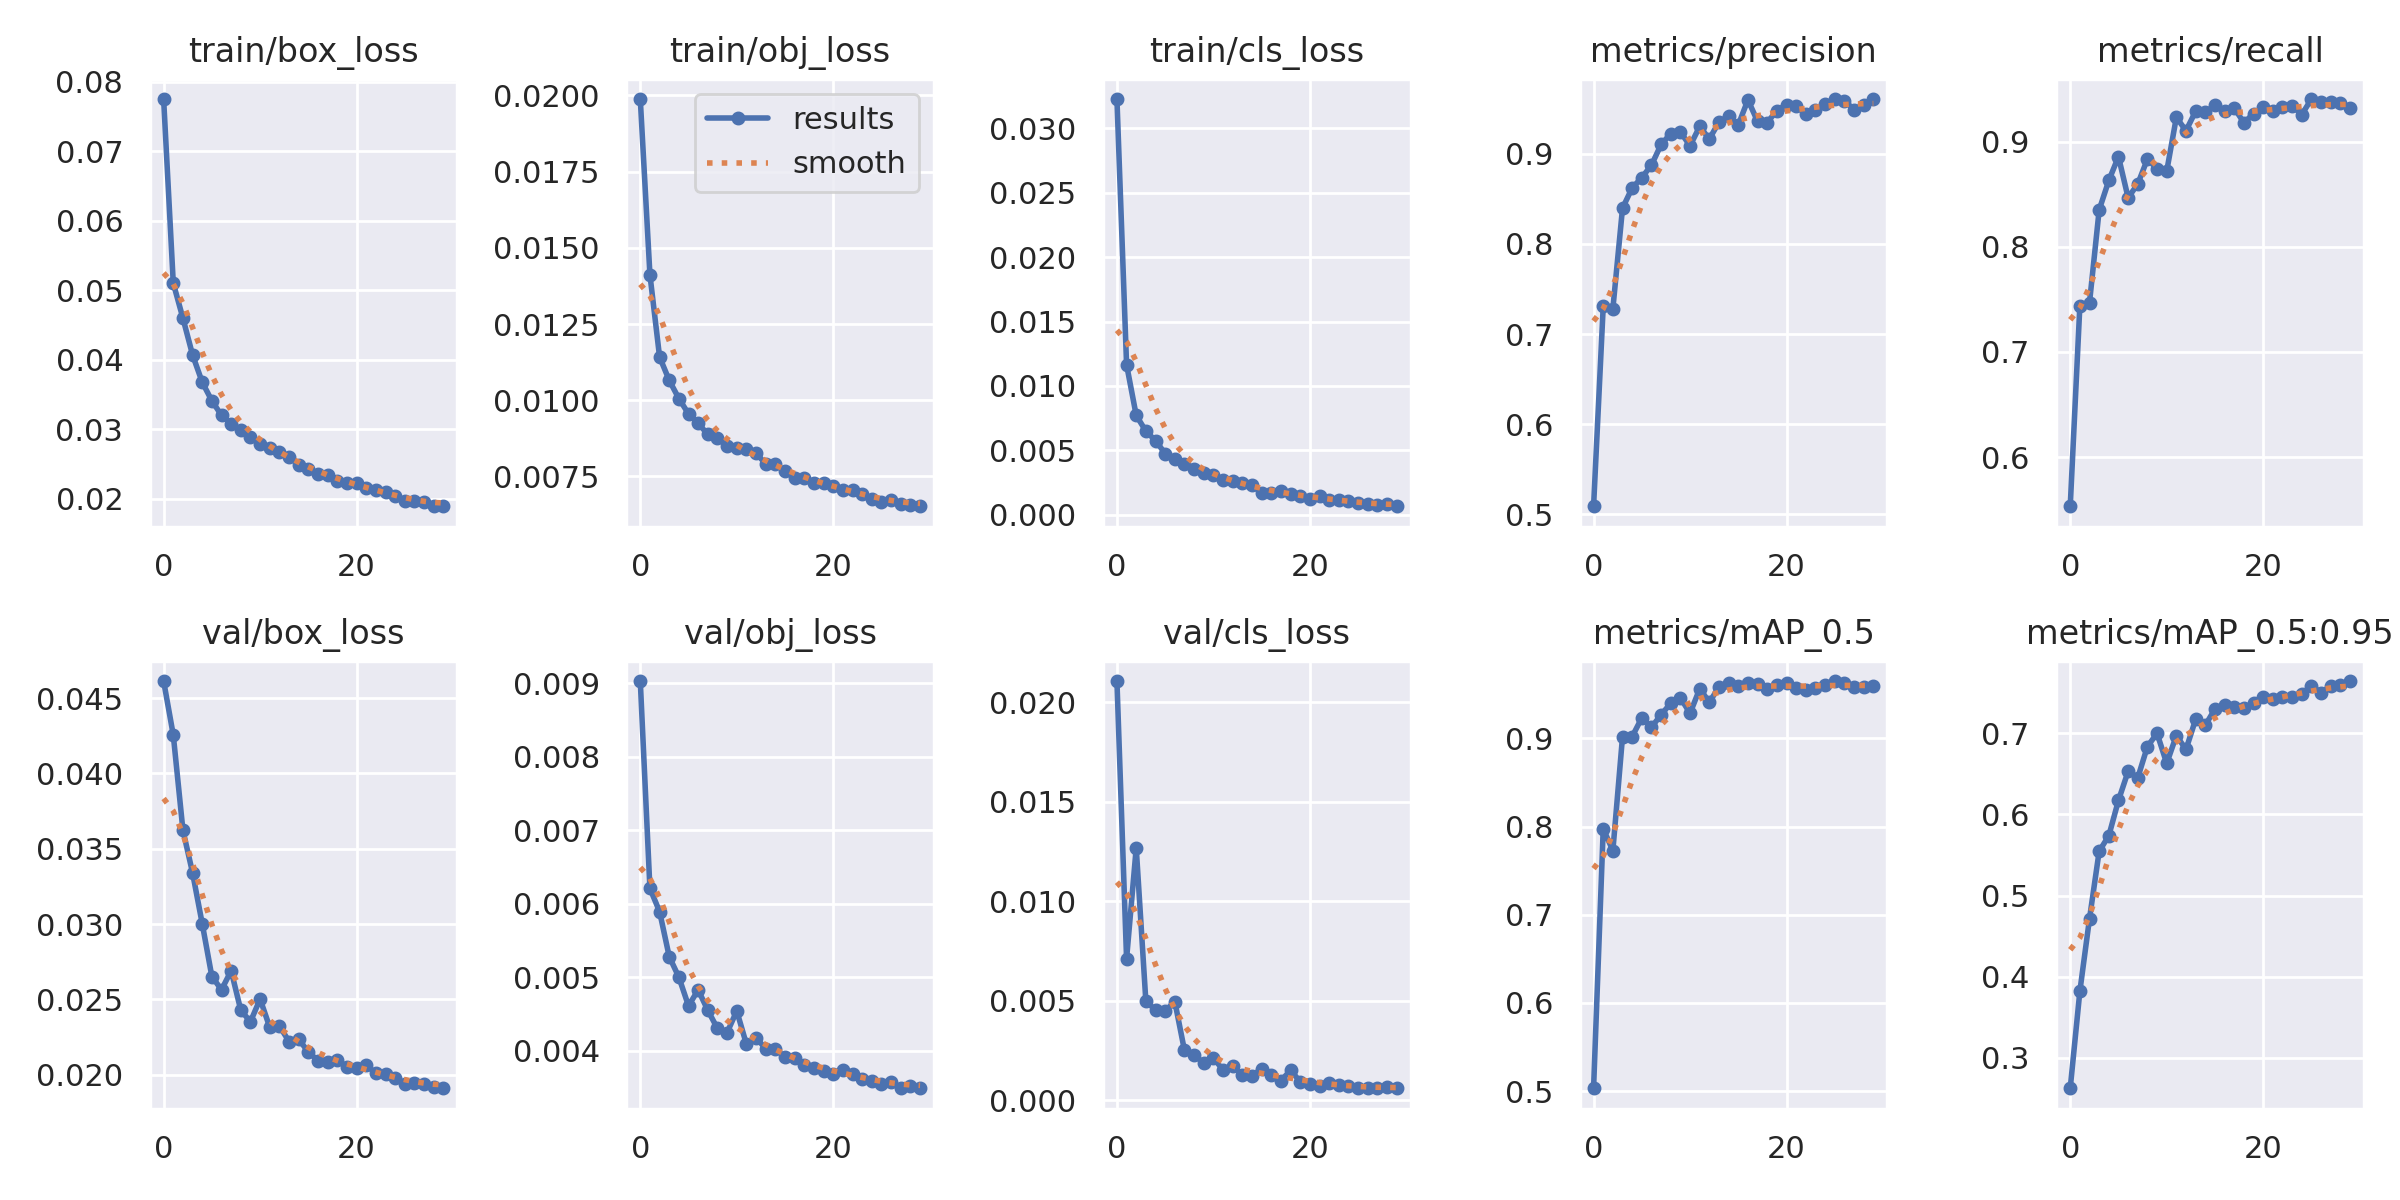

In [19]:
# evaluating the model
import utils
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png')

augmented trainig data


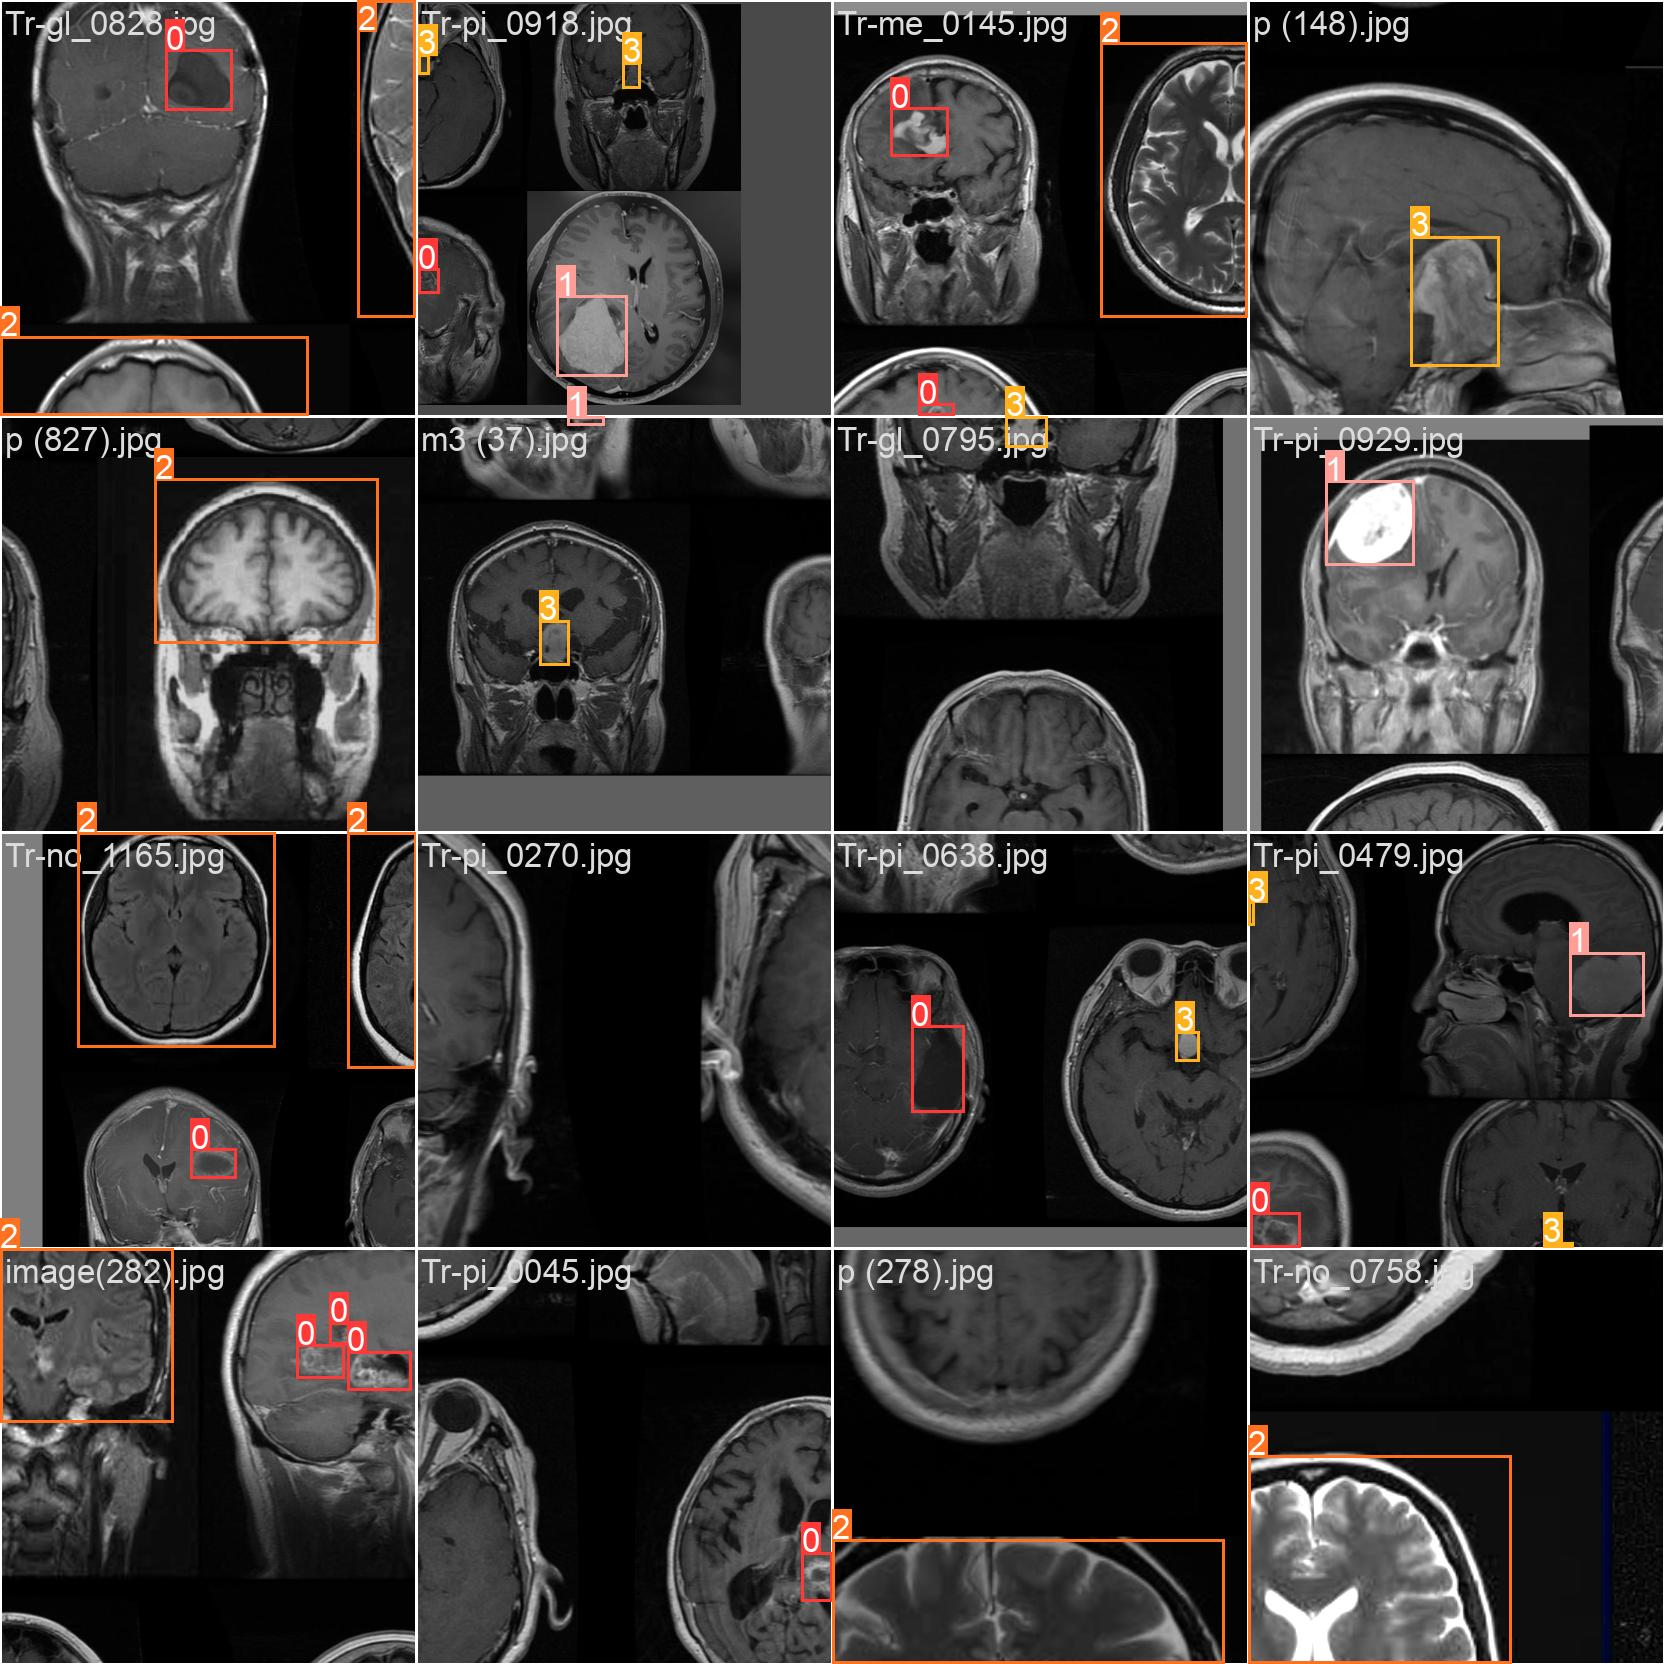

In [20]:
#printing images
print("augmented trainig data")
Image(filename = '/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=1000)

In [21]:
# run inference with trained weights
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source /content/yolov5/MRI_brain_tumor/val/images/Te-pi_0041.jpg

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolov5/MRI_brain_tumor/val/images/Te-pi_0041.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/MRI_brain_tumor/val/images/Te-pi_0041.jpg: 416x416 1 no_tumor, 10.6ms
Speed: 0.5ms pre-process, 10.6ms inference, 169.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
